In [6]:
import numpy as np
import matplotlib.pyplot as plt
import packages
from math import floor
from numpy import log10

In [22]:
def find_exp(number) -> int:
    base10 = log10(abs(number))
    return floor(base10)
    
def plot_observables(filename: str, N : int, e_unit: str, t_unit:str, p_unit:str, dt_unit:str):
    _dict = {'fontsize': 12, 'fontweight': '200', 'color': 'blue'}
    with open('data/{i}'.format(i=filename), 'rb') as f:
        data_loaded = np.load(f, allow_pickle=True)
        if(len(data_loaded)<=N):
            N = len(data_loaded)
        data_loaded = data_loaded[:N]
        x_timestep = [z.time_step for z in data_loaded]
        y_energy = [z.total_energy for z in data_loaded]
        y_centremasss = [ np.linalg.norm(z.center_of_mass - [0,0,0], axis=-1) for z in data_loaded]        
        
        figure = plt.figure()
        figure.set_figheight(8)
        figure.suptitle(filename)        

        #plot energy
        ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
        ax1.plot(x_timestep, y_energy)
        ax1.set(xlabel=r'time in {t}, dt={dt}'.format(t=t_unit,dt=dt_unit), ylabel=r'Total energy : {e}'.format(e=e_unit))
        
        #plot the total momentum
        _masses = np.asarray([z.masses for z in data_loaded])
        _velocities = np.asarray([z.velocities for z in data_loaded])
        momenta = np.dot(_masses , _velocities)
                
        ax2 = plt.subplot2grid((2, 2), (1, 0))
        ax2.plot(x_timestep,np.sum(momenta, axis=(1,2))) 
        ax2.set(xlabel=r'time in {t}, dt={dt}'.format(t=t_unit,dt=dt_unit), ylabel=r'Total momentum : {p}'.format(p=p_unit))
        
        #plot centre of mass
        ax3 = plt.subplot2grid((2, 2), (1, 1))
        ax3.scatter(x_timestep,y_centremasss,s=np.ones(len(data_loaded))*.05)    
        
        ax3.yaxis.tick_right() 
        ax3.yaxis.set_label_position('right')
        ax3.set(xlabel=r'time in {t}, dt={dt}'.format(t=t_unit,dt=dt_unit), ylabel=r'Centre of Mass/3d')        
        plt.show()



In [ ]:
# Provide the energy units in the given format in the function
# NASA
plot_observables(filename='_nasa_body_dataset.npy', N = 5000,e_unit="kg$m^{-2}$$s^{-2}$",t_unit='days',p_unit='kgm$s^{-2}$',dt_unit='1s')

In [47]:
# Energy and time in SI units, for 2, 3 and N body
plot_observables(filename='_2_body_dataset.npy', N = 5000,e_unit="kg$m^{-2}$$s^{-2}$",t_unit='s',p_unit='kgm$s^{-2}$',dt_unit='1s')

TypeError: plot_observables() missing 1 required positional argument: 'dt_unit'

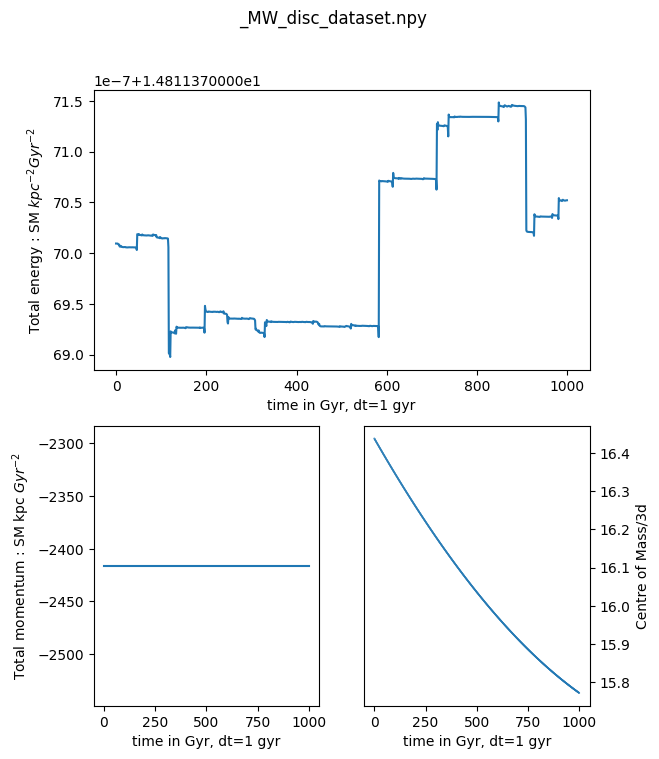

In [28]:
# Energy and time in Astronomical units, for Galaxy
plot_observables(filename='_MW_disc_dataset.npy', N = 500000,e_unit="SM $kpc^{-2}$$Gyr^{-2}$",t_unit='Gyr',p_unit='SM kpc $Gyr^{-2}$', dt_unit='1 gyr')

In [19]:
def plot_observables_horz(filename: str, N : int, e_unit: str, t_unit:str, p_unit:str,dt_unit:str):
    _dict = {'fontsize': 12, 'fontweight': '200', 'color': 'blue'}
    with open('data/{i}'.format(i=filename), 'rb') as f:
        data_loaded = np.load(f, allow_pickle=True)
        if(len(data_loaded)<=N):
            N = len(data_loaded)
        data_loaded = data_loaded[:N]
        x_timestep = [z.time_step for z in data_loaded]
        y_energy = [z.total_energy for z in data_loaded]
        y_centremasss = [ np.linalg.norm(z.center_of_mass - [0,0,0], axis=-1) for z in data_loaded]        
        
        figure = plt.figure()
        figure.set_size_inches(16,4)
        figure.suptitle(filename)        

        #plot energy
        ax1 = plt.subplot2grid((1, 3), (0, 0))
        ax1.plot(x_timestep, y_energy)
        ax1.set(xlabel=r'time in {t}, dt={dt}'.format(t=t_unit,dt=dt_unit), ylabel=r'Total energy : {e}'.format(e=e_unit))
        
        #plot the total momentum
        _masses = np.asarray([z.masses for z in data_loaded])
        _velocities = np.asarray([z.velocities for z in data_loaded])
        momenta = np.dot(_masses , _velocities)
                
        ax2 = plt.subplot2grid((1, 3), (0, 1))
        ax2.plot(x_timestep,np.sum(momenta, axis=(1,2))) 
        ax2.yaxis.set_label_position('right')
        ax2.set(xlabel=r'time in {t}, dt={dt}'.format(t=t_unit,dt=dt_unit), ylabel=r'Total momentum : {p}'.format(p=p_unit))
        
        #plot centre of mass
        ax3 = plt.subplot2grid((1, 3), (0, 2))
        ax3.scatter(x_timestep,y_centremasss,s=np.ones(len(data_loaded))*.05)    
        
        ax3.yaxis.tick_right() 
        ax3.yaxis.set_label_position('right')
        ax3.set(xlabel=r'time in {t}, dt={dt}'.format(t=t_unit,dt=dt_unit), ylabel=r'Centre of Mass/3d')        
        plt.show()



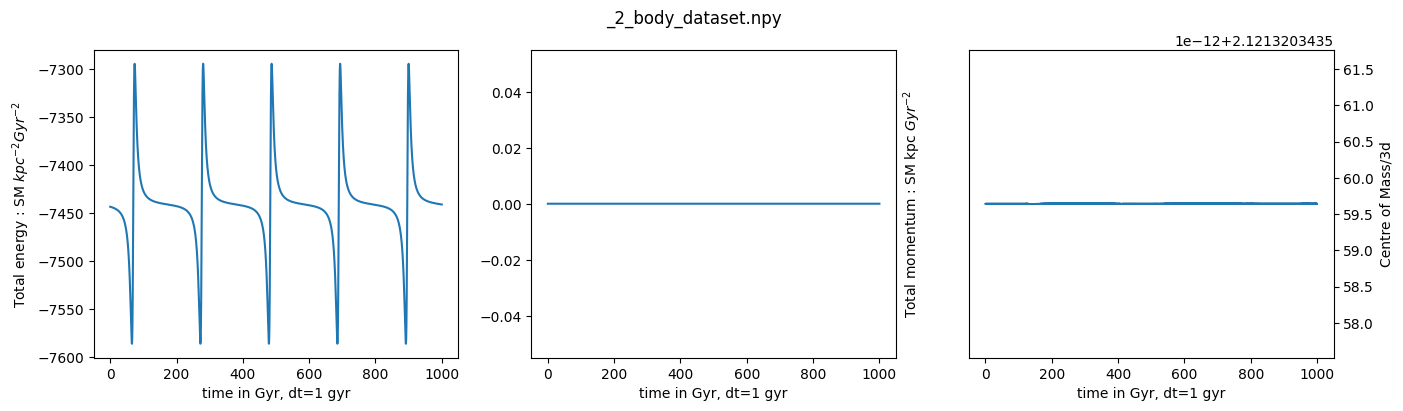

In [42]:
# Energy and time in Astronomical units, for Galaxy
plot_observables_horz(filename='_2_body_dataset.npy', N = 100000,e_unit="SM $kpc^{-2}$$Gyr^{-2}$",t_unit='Gyr',p_unit='SM kpc $Gyr^{-2}$', dt_unit='1 gyr')

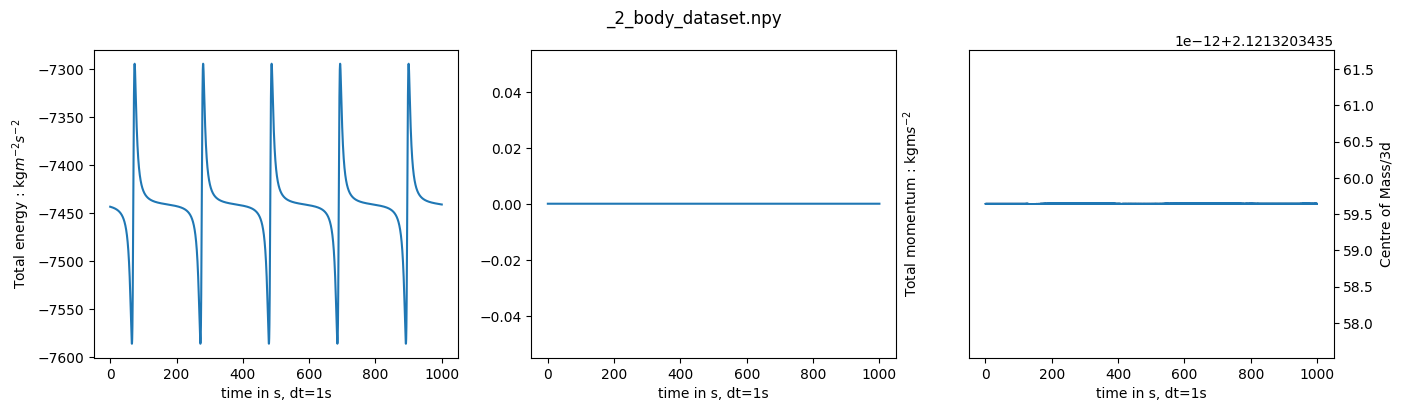

In [44]:
# Energy and time in SI units, for 2, 3 and N body
plot_observables_horz(filename='_2_body_dataset.npy', N = 10000,e_unit="kg$m^{-2}$$s^{-2}$",t_unit='s',p_unit='kgm$s^{-2}$', dt_unit='1s')

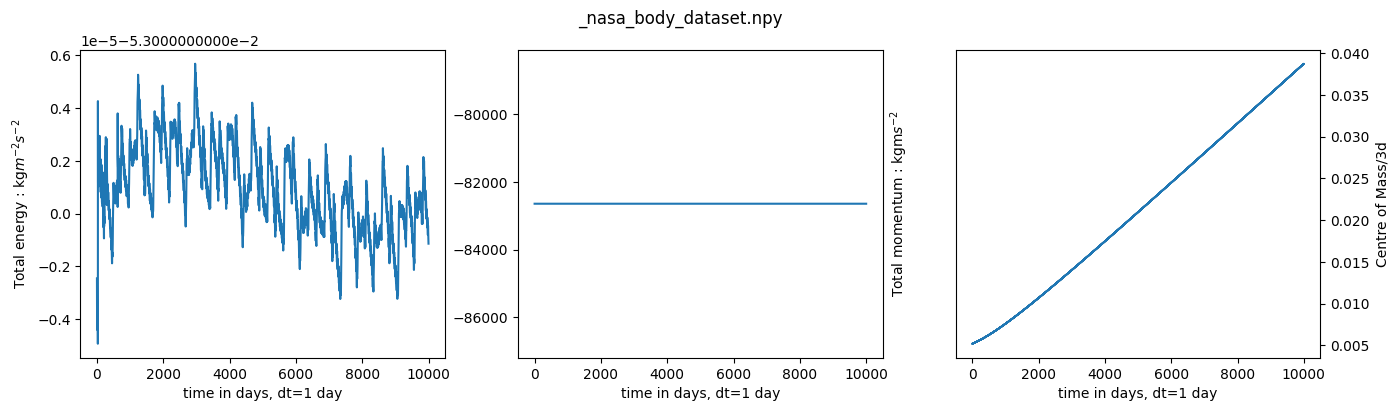

In [46]:
# Provide the energy units in the given format in the function
# NASA
plot_observables_horz(filename='_nasa_body_dataset.npy', N = 10000,e_unit="kg$m^{-2}$$s^{-2}$",t_unit='days',p_unit='kgm$s^{-2}$', dt_unit='1 day')

In [ ]:
from galpy.potential import (plotRotcurve,
    MWPotential2014 as mwp14)
import matplotlib.pyplot as plt
plotRotcurve(mwp14)
plotRotcurve(mwp14[0],label='Bulge',overplot=True)
plotRotcurve(mwp14[1],label='Disk',overplot=True)
plotRotcurve(mwp14[2],label='Halo',overplot=True)
plt.legend()